In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geobr
import math
import itertools
from shapely.geometry import Point
import geopandas as gpd
import h5py

In [16]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '14'
plt.rcParams["font.family"] = "Times New Roman"

In [ ]:
file_path = './1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5'
with h5py.File(file_path, 'r') as hdf:
    keys = list(hdf.keys())
    print(keys)

['table_data', 'table_grid', 'table_info']


In [10]:
df_info = pd.read_hdf(file_path, key='table_info')
df_info

,name_station,gauge_code,city,state,responsible,source,state_abbreviation,lat,long
18980,SANTA RITA DO PARDO | S716,S716,SANTA RITA DO PARDO,MATO GROSSO DO SUL,INMET,INMET,MS,-21.305889,-52.820375
18979,RIBAS DO RIO PARDO | S715,S715,RIBAS DO RIO PARDO,MATO GROSSO DO SUL,INMET,INMET,MS,-20.466694,-53.763028
18978,PEDRO GOMES | S714,S714,PEDRO GOMES,MATO GROSSO DO SUL,INMET,INMET,MS,-18.072778,-54.548889
18976,NOVA ALVORADA DO SUL | S712,S712,NOVA ALVORADA DO SUL,MATO GROSSO DO SUL,INMET,INMET,MS,-21.450972,-54.341972
18975,LAGUNA CARAPA | S711,S711,LAGUNA CARAPA,MATO GROSSO DO SUL,INMET,INMET,MS,-22.575389,-55.160333
...,...,...,...,...,...,...,...,...,...
4,MARUDA,00047005,MARAPANIM,PARÁ,ANA,HIDROWEB,PA,-0.633600,-47.658300
3,PRIMAVERA,00047004,PRIMAVERA,PARÁ,ANA,HIDROWEB,PA,-0.929400,-47.099400
2,CURUÇA,00047003,CURUÇA,PARÁ,ANA,HIDROWEB,PA,-0.737500,-47.853600
1,SALINÓPOLIS,00047002,SALINÓPOLIS,PARÁ,ANA,HIDROWEB,PA,-0.623100,-47.353600


In [14]:
# Assuming df_info is your DataFrame containing the specified columns

# Get the maximum and minimum values from 'lat' and 'long'
max_lat = df_info['lat'].max()
min_lat = df_info['lat'].min()
max_long = df_info['long'].max()
min_long = df_info['long'].min()

# Display the results
print(f"Max lat: {max_lat}, Min lat: {min_lat}")
print(f"Max long: {max_long}, Min long: {min_long}")


Max lat: 4.6428, Min lat: -33.74222221
Max long: -32.4167, Min long: -73.6522


In [15]:
# Round up the maximum lat by 0.25
rounded_max_lat = math.ceil(max_lat / 0.25) * 0.25

# Round down the minimum lat by 0.25
rounded_min_lat = math.floor(min_lat / 0.25) * 0.25

# Round the values again
rounded_max_lat = round(rounded_max_lat, 2) + 2.5 - 0.25/2
rounded_min_lat = round(rounded_min_lat, 2) - 2.5 - 0.25/2

# Display the rounded values
print(f"Rounded Max lat: {rounded_max_lat}")
print(f"Rounded Min lat: {rounded_min_lat}")

# Round up the maximum long by 0.25
rounded_max_long = math.ceil(max_long / 0.25) * 0.25

# Round down the minimum long by 0.25
rounded_min_long = math.floor(min_long / 0.25) * 0.25

# Round the values again
rounded_max_long = round(rounded_max_long, 2) + 2.5 - 0.25/2 # centro do pixel
rounded_min_long = round(rounded_min_long, 2) - 2.5 - 0.25/2

# Display the rounded values
print(f"Rounded Max long: {rounded_max_long}")
print(f"Rounded Min long: {rounded_min_long}")

Rounded Max lat: 7.125
Rounded Min lat: -36.375
Rounded Max long: -29.875
Rounded Min long: -76.375


In [21]:
# Generate lists of lats and longs within the specified ranges
# Initialize an empty list to store the lats
lats = []

# Start with the minimum lat
current_lat = rounded_min_lat

# Increment by 0.25 until reaching the maximum lat
while current_lat <= rounded_max_lat:
    lats.append(round(current_lat, 3))  # Round to 3 decimal places
    current_lat += 0.25
    
longs = []

# Start with the minimum long
current_lon = rounded_min_long

# Increment by 0.25 until reaching the maximum long
while current_lon <= rounded_max_long:
    longs.append(round(current_lon, 3))  # Round to 3 decimal places
    current_lon += 0.25
    
# Create all possible combinations of lats and longs using itertools
all_combinations = list(itertools.product(lats, longs))

# Create a DataFrame from the combinations
df_coords = pd.DataFrame(all_combinations, columns=['lat', 'long'])
df_coords

,lat,long
0,-36.375,-76.375
1,-36.375,-76.125
2,-36.375,-75.875
3,-36.375,-75.625
4,-36.375,-75.375
...,...,...
32720,7.125,-30.875
32721,7.125,-30.625
32722,7.125,-30.375
32723,7.125,-30.125


In [19]:
br_map = geobr.read_state(year=2020)
br_map.crs = "EPSG:4326"
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head(5)

C:\Users\linde\AppData\Local\Temp\ipykernel_27272\3704933330.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)


AttributeError: 'NoneType' object has no attribute 'copy'

,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [22]:
def check_containment(row):
    point = Point(row['long'], row['lat'])  # Create Point object
    for idx, geometry in br_map['geometry'].items():
        if geometry.contains(point):
            return True  # If any geometry contains the point, return True
    return False  # If no geometry contains the point, return False

# Apply the function to each row and create a new column 'Inside_Boundary'
df_coords['Inside_Boundary'] = df_coords.apply(check_containment, axis=1)
df_coords = df_coords[df_coords['Inside_Boundary'] == True]
df_coords = df_coords.reset_index(drop = True)
df_coords

,lat,long,Inside_Boundary
0,-36.375,-76.375,False
1,-36.375,-76.125,False
2,-36.375,-75.875,False
3,-36.375,-75.625,False
4,-36.375,-75.375,False
...,...,...,...
32720,7.125,-30.875,False
32721,7.125,-30.625,False
32722,7.125,-30.375,False
32723,7.125,-30.125,False


In [23]:
df_coords = df_coords[df_coords['Inside_Boundary'] == True]
df_coords = df_coords.reset_index(drop = True)
df_coords

,lat,long,Inside_Boundary
0,-33.625,-53.375,True
1,-33.375,-53.375,True
2,-33.375,-53.125,True
3,-33.125,-53.125,True
4,-33.125,-52.875,True
...,...,...,...
11345,4.875,-60.375,True
11346,4.875,-60.125,True
11347,5.125,-60.625,True
11348,5.125,-60.375,True


In [24]:
lat_list = df_coords['lat'].values.tolist()
lon_list = df_coords['long'].values.tolist()
lat_list_border = []
lon_list_border = []

In [25]:
for i in range (len(lat_list[:])):
    lat = lat_list[i]
    lon = lon_list[i]
    lat_list_border.append(lat_list[i]+0.25)
    lat_list_border.append(lat_list[i]+0.25)
    lat_list_border.append(lat_list[i]-0.25)
    lat_list_border.append(lat_list[i]-0.25)

    lat_list_border.append(lat_list[i]+0.25)
    lat_list_border.append(lat_list[i]-0.25)

    lat_list_border.append(lat_list[i])
    lat_list_border.append(lat_list[i])

    lon_list_border.append(lon_list[i]+0.25)
    lon_list_border.append(lon_list[i]-0.25)
    lon_list_border.append(lon_list[i]+0.25)
    lon_list_border.append(lon_list[i]-0.25)

    lon_list_border.append(lon_list[i])
    lon_list_border.append(lon_list[i])

    lon_list_border.append(lon_list[i]+0.25)
    lon_list_border.append(lon_list[i]-0.25)


print(lat_list[0:1])
print(lon_list[0:1])
print(lat_list_border[0:8])
print(lon_list_border[0:8])

[-33.625]
[-53.375]
[-33.375, -33.375, -33.875, -33.875, -33.375, -33.875, -33.625, -33.625]
[-53.125, -53.625, -53.125, -53.625, -53.375, -53.375, -53.125, -53.625]


In [26]:
lat_coords = lat_list + lat_list_border
lon_coords = lon_list + lon_list_border
len(lat_coords)

102150

In [27]:
df_coords_border = pd.DataFrame({'lat': lat_coords, 'long': lon_coords})
df_coords_border = df_coords_border.drop_duplicates(ignore_index=True)
df_coords_border

,lat,long
0,-33.625,-53.375
1,-33.375,-53.375
2,-33.375,-53.125
3,-33.125,-53.125
4,-33.125,-52.875
...,...,...
12146,5.375,-60.375
12147,5.375,-60.875
12148,5.375,-60.625
12149,5.375,-60.125


In [28]:
br_map = geobr.read_state(year = 2020)
br_map.crs = "EPSG:4326"
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head()

C:\Users\linde\AppData\Local\Temp\ipykernel_27272\948283981.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)


AttributeError: 'NoneType' object has no attribute 'copy'

,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [29]:
geometry = gpd.points_from_xy(df_coords_border['long'], df_coords_border['lat'])
df_coords_border_geo = gpd.GeoDataFrame(df_coords_border, geometry=geometry, crs="EPSG:4326")
df_coords_border_geo.dropna(inplace=True)
df_coords_border_geo

AttributeError: 'NoneType' object has no attribute 'copy'

,lat,long,geometry
0,-33.625,-53.375,POINT (-53.37500 -33.62500)
1,-33.375,-53.375,POINT (-53.37500 -33.37500)
2,-33.375,-53.125,POINT (-53.12500 -33.37500)
3,-33.125,-53.125,POINT (-53.12500 -33.12500)
4,-33.125,-52.875,POINT (-52.87500 -33.12500)
...,...,...,...
12146,5.375,-60.375,POINT (-60.37500 5.37500)
12147,5.375,-60.875,POINT (-60.87500 5.37500)
12148,5.375,-60.625,POINT (-60.62500 5.37500)
12149,5.375,-60.125,POINT (-60.12500 5.37500)


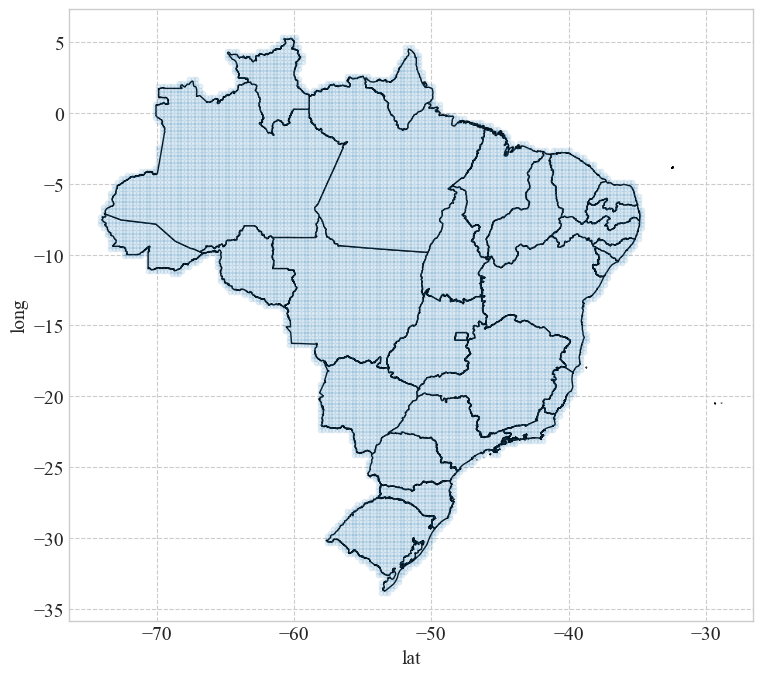

In [30]:
plt.rcParams['font.size'] = '14'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 16}

fig, ax = plt.subplots(figsize = (10, 7))
br_map.plot(ax = ax, color = 'w')
br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
df_coords_border_geo.plot(ax = ax
                    , legend = False
                    , alpha = 0.1
                    , markersize = 10
                   )
# ax.set_title("New Grid", tnr_title)

# ax.set_ylim([-35, 7])
# ax.set_xlim([-75, -33])
ax.set_xlabel('lat')
ax.set_ylabel('long')
ax.grid(ls='--')
plt.tight_layout()
plt.savefig('figures/coordinates_test.png', format='png', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

In [31]:
df_coords_border.to_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', 'table_grid', mode = 'r+', complevel = 9, encoding="utf-8")
df_coords_border

C:\Users\linde\AppData\Local\Temp\ipykernel_27272\1976700495.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df_coords_border.to_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', 'table_grid', mode = 'r+', complevel = 9, encoding="utf-8")


,lat,long
0,-33.625,-53.375
1,-33.375,-53.375
2,-33.375,-53.125
3,-33.125,-53.125
4,-33.125,-52.875
...,...,...
12146,5.375,-60.375
12147,5.375,-60.875
12148,5.375,-60.625
12149,5.375,-60.125
